In [61]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import requests
from operator import truediv
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
from scipy.integrate import simps
from scipy.stats import t
from numpy import average, std
from math import sqrt
from scipy.stats import sem
%matplotlib inline

In [62]:
#tried scraping for the data
df = requests.get('https://download.data.world/s/6ekq6uekejmenvbmsqjoyhjegnqbal')

In [63]:
#downloaded as a CSV and called on in a Data Frame
df = pd.read_csv('https://query.data.world/s/74mkuwtm5d5w4sao5tm6ephwsktkh7')

In [64]:
df1 = pd.read_csv('https://data.world/datafiniti/fast-food-restaurants-across-america/workspace/query?queryid=sample-0')

In [65]:
#very first uncleaned Data Frame
df

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AV12gJwna4HuVbed9Ayg,2017-07-24T21:28:46Z,2018-04-07T13:19:06Z,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3460robinhoodrd/-66712705,36.117563,-80.316553,Pizza Hut,27106,NC,https://www.allmenus.com/nc/winston-salem/7341...,http://www.pizzahut.com
9996,AV12gJxKIxWefVJwhpzS,2017-07-24T21:28:46Z,2018-04-07T13:19:05Z,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,us/nc/winston-salem/3069kernersvillerd/-66712705,36.077718,-80.176748,Pizza Hut,27107,NC,https://www.allmenus.com/nc/winston-salem/7340...,http://www.pizzahut.com
9997,AVwdJMdSByjofQCxl8Vr,2015-10-24T00:17:32Z,2018-04-07T13:19:05Z,838 S Main St,Fast Food Restaurants,Kernersville,US,us/nc/kernersville/838smainst/-66712705,36.111015,-80.089165,Pizza Hut,27284,NC,https://www.allmenus.com/nc/kernersville/73400...,http://www.pizzahut.com
9998,AVwdl2cykufWRAb57ZPs,2016-04-05T02:59:45Z,2018-04-07T13:19:05Z,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,us/nc/wilson/1702glendaledrsw/-66712705,35.719981,-77.945795,Pizza Hut,27893,NC,https://www.allmenus.com/nc/wilson/73403-pizza...,http://www.pizzahut.com


In [66]:
#cleaning up columns
df1 = df[['name','city','province','postalCode','latitude', 'longitude']]

In [67]:
#called data specific to 'CA'
df2 = df1.loc[df1['province'] == 'CA']

In [68]:
df2.sort_values('latitude')

,name,city,province,postalCode,latitude,longitude
8240,KFC,San Ysidro,CA,92173,32.547300,-117.034180
3336,Carl's Jr.,San Diego,CA,92154,32.555605,-116.936986
5065,Taco Bell,San Diego,CA,92154,32.582324,-117.033004
9316,Rally's,San Diego,CA,92154,32.583460,-117.099830
1686,Burger King,Imperial Beach,CA,91932,32.584401,-117.108462
...,...,...,...,...,...,...
5059,McDonald's,Weed,CA,96094,41.397659,-122.378968
5646,King Wah,Alturas,CA,96101,41.494560,-120.546840
3450,SUBWAY,Crescent City,CA,95531,41.752810,-124.187050
516,Taco Bell,Crescent City,CA,95531,41.755062,-124.193834


In [69]:
df3 = df2[['name','city','province','postalCode']]
df4 = df3.sort_values('city')

In [70]:
#changing columns to prepare for smooth merges
df5 = df4.rename(columns = {'city':'City'})
df5

,name,City,province,postalCode
1074,Baskin-Robbins,Agoura Hills,CA,91301
1075,Ameci Pizza & Pasta,Agoura Hills,CA,91301
9847,Panera Bread,Alameda,CA,94501
1888,Round Table Pizza,Alameda,CA,94501
3844,Carl's Jr.,Alameda,CA,94501
...,...,...,...,...
2478,Baskin-Robbins,Woodland Hills,CA,91364
691,Jack in the Box,Woodland Hills,CA,91367
6978,Wendy's,Yucaipa,CA,92399
2300,Subway,Yucaipa,CA,92399


In [71]:
#made another failed attempt at webscraping
page = requests.get("https://www.zip-codes.com/state/ca.asp")

In [72]:
#downloaded all files as csv and put it in the repository so it can be called upon
df10 = pd.read_csv('cazipcodes.csv')
df11 = df10.sort_values("City")
df12 = df11[['Zip Code','City', 'County']]
df12

,Zip Code,City,County
2036,95220,Acampo,San Joaquin
1309,93510,Acton,Los Angeles
798,92301,Adelanto,San Bernardino
2527,96006,Adin,Modoc
403,91376,Agoura Hills,Los Angeles
...,...,...,...
872,92399,Yucaipa,San Bernardino
794,92284,Yucca Valley,San Bernardino
796,92286,Yucca Valley,San Bernardino
2374,95698,Zamora,Yolo


In [73]:
#started the merge
df15 = pd.merge(df5, df12, how = 'inner', on = 'City')
df15.drop_duplicates()
df16  = df15.drop(['Zip Code'], axis = 1)
df16

,name,City,province,postalCode,County
0,Baskin-Robbins,Agoura Hills,CA,91301,Los Angeles
1,Baskin-Robbins,Agoura Hills,CA,91301,Los Angeles
2,Ameci Pizza & Pasta,Agoura Hills,CA,91301,Los Angeles
3,Ameci Pizza & Pasta,Agoura Hills,CA,91301,Los Angeles
4,Panera Bread,Alameda,CA,94501,Alameda
...,...,...,...,...,...
22176,Jack in the Box,Woodland Hills,CA,91367,Los Angeles
22177,Wendy's,Yucaipa,CA,92399,San Bernardino
22178,Subway,Yucaipa,CA,92399,San Bernardino
22179,Arby's,Yucca Valley,CA,92284,San Bernardino


In [74]:
#Always remember to drop duplicates
df17 = df16.drop_duplicates()

In [75]:
#continue sorting
df18 = df17.sort_values("County")
df18

,name,City,province,postalCode,County
3163,Jack in the Box,Hayward,CA,94544,Alameda
1410,Panda Express,Dublin,CA,94568,Alameda
21761,In-N-Out Burger,Union City,CA,94587,Alameda
21760,Wingstop,Union City,CA,94587,Alameda
21079,Great Wall Restaurant,San Leandro,CA,94579,Alameda
...,...,...,...,...,...
22071,Taco Bell,West Sacramento,CA,95691,Yolo
1380,Subway,Davis,CA,95616,Yolo
22075,McDonald's,West Sacramento,CA,95691,Yolo
22165,McDonald's,Woodland,CA,95776,Yolo


In [76]:
#cleaning up column names preparing for a merge
df50 = pd.read_csv("county pop.csv")
df51 = df50[['CTYNAME','Pop']]
df52 = df51.rename(columns = {'CTYNAME':'County'})
df53 = df52['County'].map(lambda x: x.replace(' County', ''))
df52['County'] =df53
df52.head()

,County,Pop
0,Los Angeles,10105518
1,San Diego,3343364
2,Orange,3185968
3,Riverside,2450758
4,San Bernardino,2171603


In [77]:
#merging df
df60 = pd.merge(df18,df52, how = 'inner', on = 'County')
df60

,name,City,province,postalCode,County,Pop
0,Jack in the Box,Hayward,CA,94544,Alameda,1666753
1,Panda Express,Dublin,CA,94568,Alameda,1666753
2,In-N-Out Burger,Union City,CA,94587,Alameda,1666753
3,Wingstop,Union City,CA,94587,Alameda,1666753
4,Great Wall Restaurant,San Leandro,CA,94579,Alameda,1666753
...,...,...,...,...,...,...
1090,Taco Bell,West Sacramento,CA,95691,Yolo,220408
1091,Subway,Davis,CA,95616,Yolo,220408
1092,McDonald's,West Sacramento,CA,95691,Yolo,220408
1093,McDonald's,Woodland,CA,95776,Yolo,220408


In [78]:
#made separate lists for calculation purposes
counties = list(df60.County.drop_duplicates())
counties

['Alameda',
 'Amador',
 'Butte',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Los Angeles',
 'Marin',
 'Mendocino',
 'Merced',
 'Modoc',
 'Monterey',
 'Napa',
 'Orange',
 'Placer',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Tehama',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

In [79]:
poplist = list(df60.Pop.drop_duplicates())
poplist

[1666753,
 39383,
 231256,
 21627,
 1150215,
 27828,
 994400,
 28047,
 136373,
 181827,
 17987,
 896764,
 151366,
 10105518,
 259666,
 87606,
 274765,
 8777,
 435594,
 139417,
 3185968,
 393149,
 2450758,
 1540975,
 61537,
 2171603,
 3343364,
 883305,
 752660,
 284010,
 769545,
 446527,
 1937570,
 274255,
 180040,
 43724,
 446610,
 499942,
 549815,
 63916,
 465861,
 54539,
 850967,
 220408,
 78041]

In [80]:
fastfood = list(df60.County.value_counts().sort_index())
fastfood

[46,
 1,
 4,
 1,
 27,
 2,
 25,
 2,
 4,
 2,
 1,
 18,
 3,
 332,
 1,
 1,
 5,
 1,
 6,
 5,
 114,
 14,
 54,
 37,
 1,
 59,
 102,
 15,
 6,
 9,
 32,
 4,
 69,
 7,
 3,
 1,
 11,
 13,
 15,
 2,
 7,
 1,
 27,
 4,
 1]

In [81]:
a = (counties, poplist, fastfood)
a
df83 = pd.DataFrame(a).T
df83.rename(columns = {0:'County'})


,County,1,2
0,Alameda,1666753,46
1,Amador,39383,1
2,Butte,231256,4
3,Colusa,21627,1
4,Contra Costa,1150215,27
5,Del Norte,27828,2
6,Fresno,994400,25
7,Glenn,28047,2
8,Humboldt,136373,4
9,Imperial,181827,2


In [82]:
#Renamed columns so this Df can be worked with.
df84 = df83.rename(columns = {0:'County', 1:'Population', 2: 'Fast_Food'})
df84

,County,Population,Fast_Food
0,Alameda,1666753,46
1,Amador,39383,1
2,Butte,231256,4
3,Colusa,21627,1
4,Contra Costa,1150215,27
5,Del Norte,27828,2
6,Fresno,994400,25
7,Glenn,28047,2
8,Humboldt,136373,4
9,Imperial,181827,2


In [83]:
df85 = df84.sort_values("Population")
df85

,County,Population,Fast_Food
17,Modoc,8777,1
10,Inyo,17987,1
3,Colusa,21627,1
5,Del Norte,27828,2
7,Glenn,28047,2
1,Amador,39383,1
35,Siskiyou,43724,1
41,Tuolumne,54539,1
24,San Benito,61537,1
39,Tehama,63916,2


In [84]:
#found the median of this data set to know how to split the data
df85.iloc[[23]]

,County,Population,Fast_Food
21,Placer,393149,14


In [94]:
df86 = df85[df85['Population'].between(1000000, 4000000)]
print(df86)
df87 = df85[df85['Population'].between(250000, 999999, inclusive=False)]
print(df87)

            County  Population  Fast_Food
4     Contra Costa     1150215         27
23      Sacramento     1540975         37
0          Alameda     1666753         46
32     Santa Clara     1937570         69
25  San Bernardino     2171603         59
22       Riverside     2450758         54
20          Orange     3185968        114
26       San Diego     3343364        102
             County  Population  Fast_Food
14            Marin      259666          1
33       Santa Cruz      274255          7
16           Merced      274765          5
29  San Luis Obispo      284010          9
21           Placer      393149         14
18         Monterey      435594          6
31    Santa Barbara      446527          4
36           Solano      446610         11
40           Tulare      465861          7
37           Sonoma      499942         13
38       Stanislaus      549815         15
28      San Joaquin      752660          6
30        San Mateo      769545         32
42          Ventura 

In [86]:
#these were objects, had to convert to integers then run a .describe()
df85[["Population", "Fast_Food"]] = df85[["Population", "Fast_Food"]].apply(pd.to_numeric)
df85.describe()

,Population,Fast_Food
count,4.500000e+01,45.000000
mean,8.623168e+05,24.333333
std,1.633920e+06,53.597405
min,8.777000e+03,1.000000
25%,8.760600e+04,2.000000
50%,2.840100e+05,6.000000
75%,8.833050e+05,25.000000
max,1.010552e+07,332.000000


In [87]:
#confidence interval of group over 1million
mean = 63.5
    # evaluate sample variance by setting delta degrees of freedom (ddof) to
    # 1. The degree used in calculations is N - ddof
stddev = 30.5
    # Get the endpoints of the range that contains 95% of the distribution
t_bounds = t.interval(0.95, 7)
    # sum mean to the confidence interval
ci = [mean + critical * stddev / sqrt(8) for critical in t_bounds]
print("Mean: %f" % mean)
print("Confidence Interval 95%%: %f, %f" % (ci[0], ci[1]))

Mean: 63.500000
Confidence Interval 95%: 38.001362, 88.998638


In [95]:
#it has been determined that a significance of two slopes calculation must be made to determine p value
#must gather sample sizes, slopes, and standard errors for both groups

#slopes
df86slope = (df86['Fast_Food'][1] - df86['Fast_Food'][0]) / (df86['Population'][1] - df86['Population'][0])
df86slope

KeyError: 1

Text(0.5, 1.0, 'Fast Food Restaurants to Number of Population')

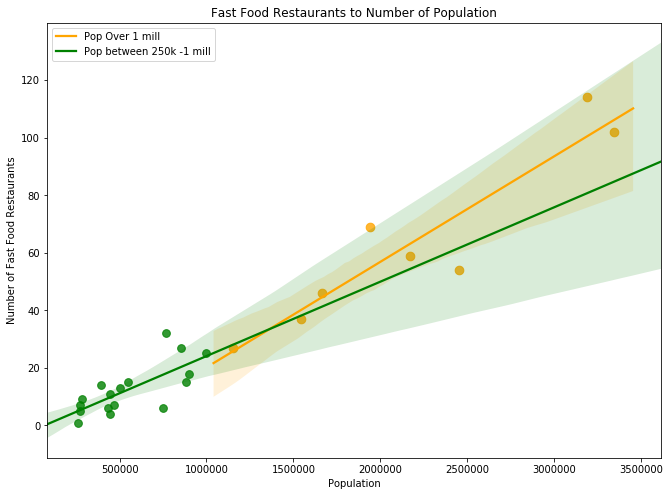

In [96]:
#plotting the data
plt.figure(figsize = (11,8))
sns.regplot(df86['Population'], df86['Fast_Food'], color = 'orange', marker='o', scatter_kws={'s':75}, label = "Pop Over 1 mill")
sns.regplot(df87['Population'], df87['Fast_Food'], color = 'green', marker='o', scatter_kws={'s':60}, label = "Pop between 250k -1 mill")
plt.legend(labels = ["Pop Over 1 mill","Pop between 250k -1 mill"], loc = 'upper left')
plt.grid
plt.xlabel('Population')
plt.ylabel("Number of Fast Food Restaurants")
plt.title("Fast Food Restaurants to Number of Population")

In [90]:
#more data conversion
df86[["Population", "Fast_Food"]] = df86[["Population", "Fast_Food"]].apply(pd.to_numeric)
df86.describe()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Population,Fast_Food
count,8.000000e+00,8.000000
mean,2.180901e+06,63.500000
std,7.773367e+05,30.505269
min,1.150215e+06,27.000000
25%,1.635308e+06,43.750000
50%,2.054586e+06,56.500000
75%,2.634560e+06,77.250000
max,3.343364e+06,114.000000


In [ ]:
print(sem([[1150215, 1540975, 1666753, 1937570, 2171603, 2450758, 3185968, 3343364],
           [27, 37, 46, 69, 59, 54, 114, 102]], axis=1))

In [ ]:
df87[["Population", "Fast_Food"]] = df87[["Population", "Fast_Food"]].apply(pd.to_numeric)df87.describe()

In [ ]:
#ttest code
t_score = stats.ttest_ind_from_stats(mean1=63.5, std1=np.sqrt(30.50), nobs1=8, \
                               mean2=12.65, std2=np.sqrt(8.7), nobs2=17, \
                               equal_var=False)
t_score

In [ ]:
ratios = []
def ratio():
    for i,k in zip(poplist, fastfood):
        ratios.append(i/k)
        return ratios
ratio()
ratios

In [ ]:
analysis = TTestIndPower()

# parameters for power analysis
effect = 0.5
alpha = .05

power = .7
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1= None, ratio=1.0, alpha = alpha)
print('Sample Size: %.3f' % result)